In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = {
    "A": 1.0,
    "B": pd.Timestamp("20150101"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3,3,3,3],dtype="int32"),
    "E": pd.Categorical(["test","train","test","train"]),
    "F": "foo"
}

In [4]:
df = pd.DataFrame(data)
print(df)

     A          B    C  D      E    F
0  1.0 2015-01-01  1.0  3   test  foo
1  1.0 2015-01-01  1.0  3  train  foo
2  1.0 2015-01-01  1.0  3   test  foo
3  1.0 2015-01-01  1.0  3  train  foo


In [32]:
df = pd.read_csv("weather.csv")
df["Precipitation (inches)"] = df["Precipitation (inches)"].replace("T","0.0")
df["Precipitation (inches)"] = pd.to_numeric(df["Precipitation (inches)"])
df["Snow (inches)"] = df["Snow (inches)"].replace("T","0.0")
df["Snow (inches)"] = pd.to_numeric(df["Snow (inches)"])
df["Date"] = pd.to_datetime(df["Date"])
print(df.head())

        Date  Maximum Temperature degrees (F)  \
0 2020-01-01                             36.0   
1 2020-01-02                             37.0   
2 2020-01-03                             36.0   
3 2020-01-04                             30.0   
4 2020-01-05                             38.0   

   Minimum Temperature degrees (F)  Precipitation (inches)  Snow (inches)  \
0                             13.0                    0.00            0.0   
1                             31.0                    0.00            0.0   
2                             24.0                    0.00            0.0   
3                             24.0                    0.00            0.0   
4                             24.0                    0.01            0.0   

  Snow Depth (inches)  
0                5.00  
1                5.00  
2                4.00  
3                4.00  
4                4.00  


In [16]:
print(df.tail())

            Date  Maximum Temperature degrees (F)  \
1432  2023-12-03                             37.0   
1433  2023-12-04                             37.0   
1434  2023-12-05                             34.0   
1435  2023-12-06                             47.0   
1436  2023-12-07                             51.0   

      Minimum Temperature degrees (F)  Precipitation (inches)  Snow (inches)  \
1432                             31.0                    0.00            0.0   
1433                             26.0                    0.03            0.6   
1434                             24.0                    0.03            0.3   
1435                             22.0                    0.00            0.0   
1436                             30.0                    0.00            0.0   

     Snow Depth (inches)  
1432                0.00  
1433                0.00  
1434                1.00  
1435                   T  
1436                0.00  


In [17]:
print(df.describe())

       Maximum Temperature degrees (F)  Minimum Temperature degrees (F)  \
count                      1437.000000                      1437.000000   
mean                         57.384830                        39.885177   
std                          24.165317                        22.216930   
min                          -4.000000                       -19.000000   
25%                          37.000000                        24.000000   
50%                          59.000000                        40.000000   
75%                          79.000000                        60.000000   
max                         101.000000                        79.000000   

       Precipitation (inches)  Snow (inches)  
count             1437.000000    1437.000000  
mean                 0.073925       0.152540  
std                  0.222788       0.801654  
min                  0.000000       0.000000  
25%                  0.000000       0.000000  
50%                  0.000000       0.0000

In [20]:
rain_data = df["Precipitation (inches)"]
print(rain_data)

0       0.00
1       0.00
2       0.00
3       0.00
4       0.01
        ... 
1432    0.00
1433    0.03
1434    0.03
1435    0.00
1436    0.00
Name: Precipitation (inches), Length: 1437, dtype: float64


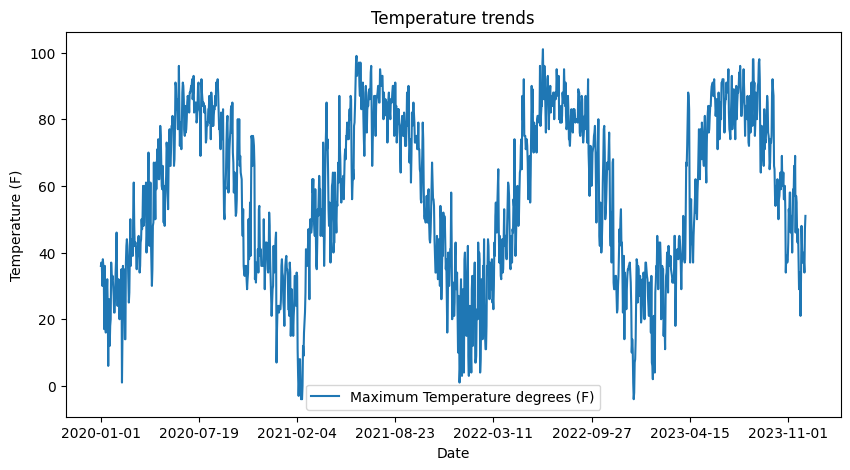

In [21]:
df.plot(x="Date",y="Maximum Temperature degrees (F)", figsize=(10,5))

plt.title("Temperature trends")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()


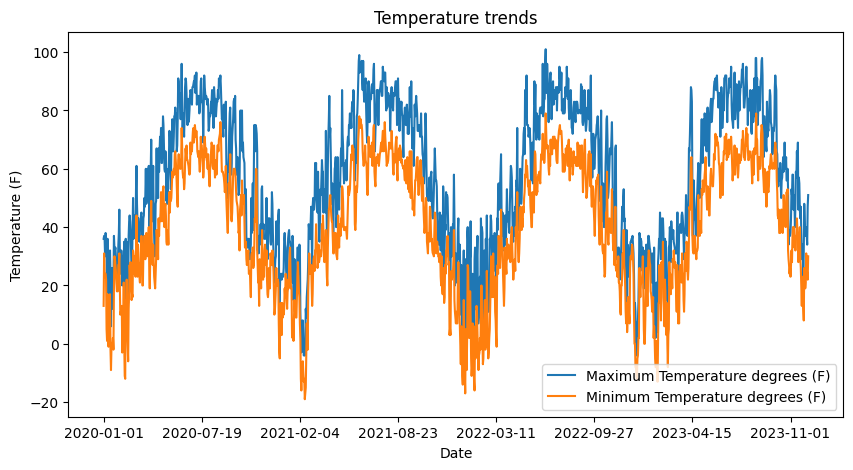

In [24]:
df.plot(x="Date",y=["Maximum Temperature degrees (F)", "Minimum Temperature degrees (F)"], figsize=(10,5))

plt.title("Temperature trends")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()


array([[<Axes: title={'center': 'Precipitation (inches)'}>]], dtype=object)

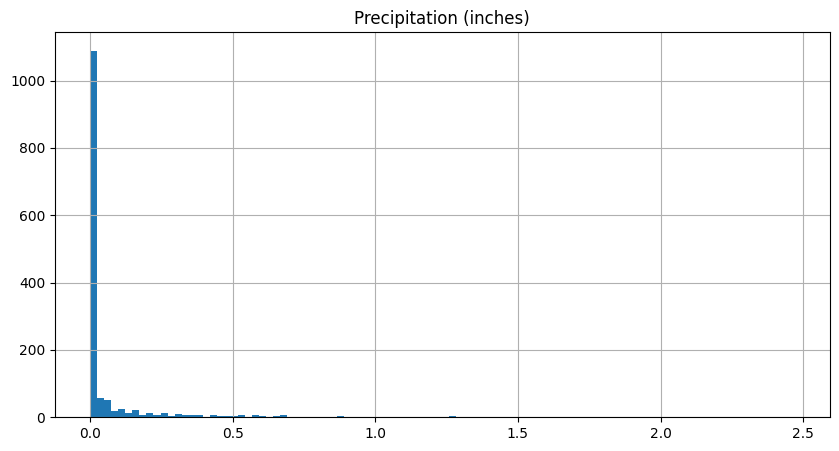

In [26]:
df.hist("Precipitation (inches)",bins=100, figsize=(10,5))

array([[<Axes: title={'center': 'Precipitation (inches)'}>]], dtype=object)

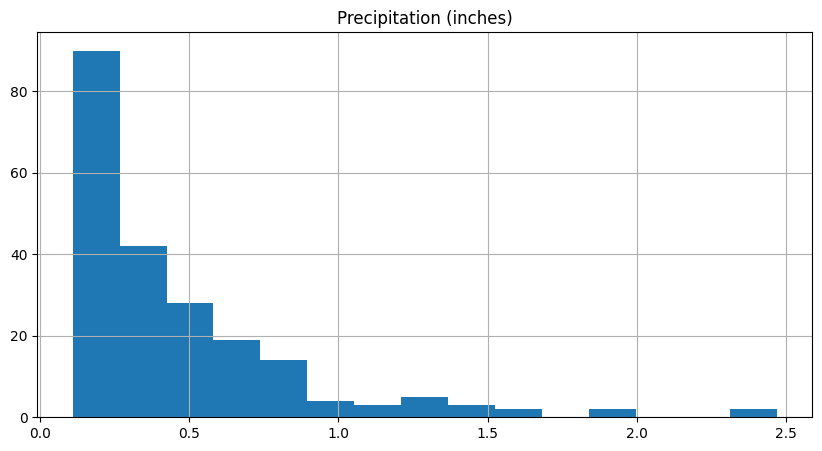

In [29]:
high_precipitation = df[df["Precipitation (inches)"] > 0.1]
high_precipitation.hist("Precipitation (inches)",bins=15, figsize=(10,5))

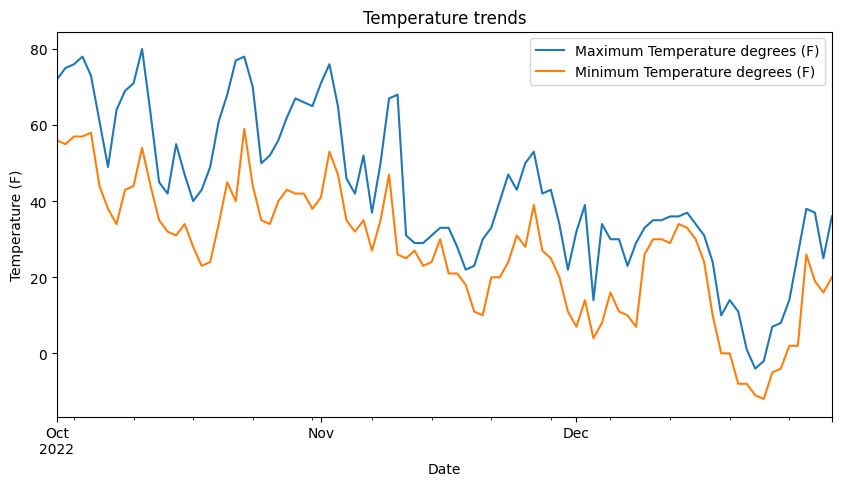

In [37]:
# Oct-Dec, 2020
end_of_2020 = df[ (df["Date"].dt.year == 2022) & (df["Date"].dt.month >= 10) & (df["Date"].dt.month <= 12)]
end_of_2020.plot(x="Date",y=["Maximum Temperature degrees (F)", "Minimum Temperature degrees (F)"], figsize=(10,5))

plt.title("Temperature trends")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()

In [41]:
#Maximum temperature in January 2022
# Challenge - using list comprehensions, or another method get the maximum temperature of every month in 2022
max(df["Maximum Temperature degrees (F)"][ (df["Date"].dt.year == 2022) & (df["Date"].dt.month == 1)])

42.0